In [123]:
import matplotlib.pyplot as plt
import scipy


In [124]:
mat_file = scipy.io.loadmat("../../data/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat")


In [125]:
mat_file['RELEASE'][0]

array([(array([[(array([[(array(['037454012.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[3.88073395]]), array([[(array([[601]], dtype=uint16), array([[380]], dtype=uint16))]],
                             dtype=[('x', 'O'), ('y', 'O')]))                                                         ]],
                     dtype=[('scale', 'O'), ('objpos', 'O')]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))                                                      ,
               (array([[(array(['095071431.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[8.07816613]]), array([[(array([[881]], dtype=uint16), array([[394]], dtype=uint16))]],
                             dtype=[('x', 'O'), ('y', 'O')]))                                                         ,
                       (array([[8.90412938]]), array([[(array([[338]], dtype=uint16), array([[210]], dtype=uint8))]],
                             dtype=[('x', 'O'),

In [162]:
annopoints = mat_file['RELEASE'][0]['annolist'][0][0]
annopoints

array([(array([[(array(['037454012.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[3.88073395]]), array([[(array([[601]], dtype=uint16), array([[380]], dtype=uint16))]],
                     dtype=[('x', 'O'), ('y', 'O')]))                                                         ]],
             dtype=[('scale', 'O'), ('objpos', 'O')]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))                                                      ,
       (array([[(array(['095071431.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[8.07816613]]), array([[(array([[881]], dtype=uint16), array([[394]], dtype=uint16))]],
                     dtype=[('x', 'O'), ('y', 'O')]))                                                         ,
               (array([[8.90412938]]), array([[(array([[338]], dtype=uint16), array([[210]], dtype=uint8))]],
                     dtype=[('x', 'O'), ('y', 'O')]))                                           

In [416]:
i = 8
annopoints['annorect'][i][0]


array([(array([[806]], dtype=uint16), array([[56]], dtype=uint8), array([[901]], dtype=uint16), array([[183]], dtype=uint8), array([[(array([[(array([[904]], dtype=uint16), array([[237]], dtype=uint8), array([[6]], dtype=uint8), array([[1]], dtype=uint8)),
                       (array([[858]], dtype=uint16), array([[135]], dtype=uint8), array([[7]], dtype=uint8), array([[1]], dtype=uint8)),
                       (array([[871.1877]]), array([[180.4244]]), array([[8]], dtype=uint8), array([], shape=(0, 0), dtype=uint8)),
                       (array([[835.8123]]), array([[58.5756]]), array([[9]], dtype=uint8), array([], shape=(0, 0), dtype=uint8)),
                       (array([[980]], dtype=uint16), array([[322]], dtype=uint16), array([[0]], dtype=uint8), array([[1]], dtype=uint8)),
                       (array([[896]], dtype=uint16), array([[318]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
                       (array([[865]], dtype=uint16), array([[24

In [135]:
mat_file['RELEASE'][0]['annolist'][0][0][5][1][0]['annopoints'][0][0]["point"][0][0] # points of limbs

array([(array([[2]], dtype=uint8), array([[806]], dtype=uint16), array([[543]], dtype=uint16), array(['1'], dtype='<U1')),
       (array([[3]], dtype=uint8), array([[720]], dtype=uint16), array([[593]], dtype=uint16), array(['1'], dtype='<U1')),
       (array([[6]], dtype=uint8), array([[763]], dtype=uint16), array([[568]], dtype=uint16), array(['1'], dtype='<U1')),
       (array([[7]], dtype=uint8), array([[683]], dtype=uint16), array([[290]], dtype=uint16), array(['0'], dtype='<U1')),
       (array([[8]], dtype=uint8), array([[682]], dtype=uint16), array([[256]], dtype=uint16), array([], shape=(0, 0), dtype=uint8)),
       (array([[9]], dtype=uint8), array([[676]], dtype=uint16), array([[68]], dtype=uint8), array([], shape=(0, 0), dtype=uint8)),
       (array([[10]], dtype=uint8), array([[563]], dtype=uint16), array([[296]], dtype=uint16), array(['1'], dtype='<U1')),
       (array([[11]], dtype=uint8), array([[555]], dtype=uint16), array([[410]], dtype=uint16), array(['1'], dtype='<U

In [129]:
acts = mat_file['RELEASE'][0]['act']

In [130]:
annotations = mat_file['RELEASE'][0]['annolist'][0][0]
annotations

array([(array([[(array(['037454012.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[3.88073395]]), array([[(array([[601]], dtype=uint16), array([[380]], dtype=uint16))]],
                     dtype=[('x', 'O'), ('y', 'O')]))                                                         ]],
             dtype=[('scale', 'O'), ('objpos', 'O')]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))                                                      ,
       (array([[(array(['095071431.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[8.07816613]]), array([[(array([[881]], dtype=uint16), array([[394]], dtype=uint16))]],
                     dtype=[('x', 'O'), ('y', 'O')]))                                                         ,
               (array([[8.90412938]]), array([[(array([[338]], dtype=uint16), array([[210]], dtype=uint8))]],
                     dtype=[('x', 'O'), ('y', 'O')]))                                           

In [131]:
mat_file['RELEASE'][0]['img_train'][0][0][0]

0

In [214]:
annotations['image'][1][0][0][0][0]

'095071431.jpg'

In [277]:
good_images = []

for i in range(len(annotations)):
    image_name = annotations['image'][i][0][0][0][0]
    act_name = mat_file['RELEASE'][0]['act'][0][i]['act_name'][0][0] \
        if mat_file['RELEASE'][0]['act'][0][i]['act_name'][0].size > 0 \
        else None

    cat_name = mat_file['RELEASE'][0]['act'][0][i]['cat_name'][0][0] \
        if mat_file['RELEASE'][0]['act'][0][i]['cat_name'][0].size > 0 \
        else None

    person_count = mat_file['RELEASE'][0]['single_person'][0][i][0].size

    if person_count != 1:
        continue

    joints = {idx: -1 for idx in range(16)}
    try:
        limbs = annopoints['annorect'][i][0]['annopoints'][0][0]
        for jnt in annopoints['annorect'][i][0]['annopoints'][0][0]['point'][0][0]:
            try:
                if jnt[2][0][0] in range(16):
                    joints[jnt[2][0][0]] = (jnt[1][0][0], jnt[0][0][0])
            except ValueError as error:
                continue

        lim = True
    except ValueError as error:
        continue
    except IndexError as error:
        continue

    # if -1 in joints.values():
    #     continue

    img_train = mat_file['RELEASE'][0]['img_train'][0][0][i]
    # print(image_name, "|", act_name, "|", cat_name, "|", person_count, "|", joints)
    good_images.append([image_name, act_name, cat_name, person_count, joints])

In [254]:
joints = {0: (581, 732), 1: (335, 712), 2: (405, 788), 3: (416, 867), 4: (396, 1028), 5: (598, 880), 6: (411, 828), 7: (229, 793), 8: (265.5864, 798.0271), 9: (61.4136, 769.9729), 10: (485, 741), 11: (420, 630), 12: (263, 727), 13: (194, 858), 14: (344, 956), 15: (472, 886)}

In [261]:
len(good_images)

12221

In [264]:
import pandas as pd

column_names = ['name', 'activity', 'category', 'person_count',
                'r ankle', 'r knee', 'r hip', 'l hip', 'l knee', 'l ankle', 'pelvis', 'thorax', 'upper neck', 'head top', 'r wrist', 'r elbow', 'r shoulder', 'l shoulder', 'l elbow', 'l wrist']

joint_names = column_names[4:]

joint_dict = {
    joint_names[idx]: idx for idx in range(len(joint_names))
}


In [278]:
good_images[1][-1]

{0: (322, 980),
 1: (318, 896),
 2: (248, 865),
 3: (226, 943),
 4: (290, 948),
 5: (349, 881),
 6: (237, 904),
 7: (135, 858),
 8: (180.4244, 871.1877),
 9: (58.5756, 835.8123),
 10: (294, 772),
 11: (247, 754),
 12: (147, 792),
 13: (123, 923),
 14: (163, 995),
 15: (223, 961)}

In [280]:
dataset_list = []

for row in good_images:
    single_row = []
    joints = row[-1]

    single_row.append(row[0])
    single_row.append(row[1])
    single_row.append(row[2])
    single_row.append(row[3])

    for jdx in range(0, len(joints.keys())):
        single_row.append(joints[jdx])

    dataset_list.append(single_row)


In [281]:
dataset_list

[['015599452.jpg',
  'curling',
  'sports',
  1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 ['060111501.jpg',
  'curling',
  'sports',
  1,
  (322, 980),
  (318, 896),
  (248, 865),
  (226, 943),
  (290, 948),
  (349, 881),
  (237, 904),
  (135, 858),
  (180.4244, 871.1877),
  (58.5756, 835.8123),
  (294, 772),
  (247, 754),
  (147, 792),
  (123, 923),
  (163, 995),
  (223, 961)],
 ['002058449.jpg',
  'curling',
  'sports',
  1,
  (456, 918),
  (518, 659),
  (413, 713),
  (288, 979),
  (453, 1222),
  (399, 974),
  (351, 846),
  (259, 738),
  (314.8937, 795.2738),
  (122.1063, 597.7262),
  (490, 441),
  (434, 446),
  (270, 599),
  (247, 877),
  (384, 1112),
  (489, 1012)],
 ['029122914.jpg',
  'truck driving, loading and unloading truck, tying down load, standing, walking and carrying heavy lo',
  'occupation',
  1,
  -1,
  (473, 301),
  (346, 302),
  (345, 362),
  (470, 367),
  -1,
  (346, 332),
  (217, 325),
  (196.1669, 326.2681)

In [282]:
datas = pd.DataFrame(dataset_list, columns=column_names)

In [302]:
datas.to_csv("dataset_with_limbs")

In [393]:
datas[datas.activity == 'yoga, Power'].__len__()

244

In [375]:
datas.head(1000)

,name,activity,category,person_count,r ankle,r knee,r hip,l hip,l knee,l ankle,pelvis,thorax,upper neck,head top,r wrist,r elbow,r shoulder,l shoulder,l elbow,l wrist
0,015599452.jpg,curling,sports,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,060111501.jpg,curling,sports,1,"(322, 980)","(318, 896)","(248, 865)","(226, 943)","(290, 948)","(349, 881)","(237, 904)","(135, 858)","(180.4244, 871.1877)","(58.5756, 835.8123)","(294, 772)","(247, 754)","(147, 792)","(123, 923)","(163, 995)","(223, 961)"
2,002058449.jpg,curling,sports,1,"(456, 918)","(518, 659)","(413, 713)","(288, 979)","(453, 1222)","(399, 974)","(351, 846)","(259, 738)","(314.8937, 795.2738)","(122.1063, 597.7262)","(490, 441)","(434, 446)","(270, 599)","(247, 877)","(384, 1112)","(489, 1012)"
3,029122914.jpg,"truck driving, loading and unloading truck, ty...",occupation,1,-1,"(473, 301)","(346, 302)","(345, 362)","(470, 367)",-1,"(346, 332)","(217, 325)","(196.1669, 326.2681)","(122.8331, 330.7319)","(299, 275)","(300, 262)","(220, 278)","(213, 371)","(309, 396)","(290, 393)"
4,061185289.jpg,"truck driving, loading and unloading truck, ty...",occupation,1,-1,-1,-1,-1,-1,-1,-1,"(322, 533)","(277.1333, 515.0945)","(148.8667, 463.9055)","(172, 353)","(239, 426)","(288, 513)","(355, 552)",-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,013924537.jpg,"yoga, Power",conditioning exercise,1,"(369, 516)","(508, 578)","(559, 555)","(545, 630)","(491, 799)","(315, 739)","(552, 593)","(435, 465)","(443.5567, 476.2307)","(346.4433, 348.7693)","(336, 437)","(396, 437)","(466, 413)","(404, 516)","(357, 632)","(282, 712)"
996,053242068.jpg,"yoga, Power",conditioning exercise,1,"(613, 654)","(605, 472)","(419, 479)","(406, 632)","(599, 547)","(588, 657)","(413, 556)","(230, 464)","(195.1214, 459.0832)","(37.8786, 436.9168)","(634, 322)","(402, 361)","(249, 369)","(210, 559)","(396, 570)","(634, 636)"
997,041109560.jpg,"yoga, Power",conditioning exercise,1,"(364, 237)","(360, 324)","(263, 324)","(260, 331)","(343, 327)","(339, 252)","(262, 328)","(186, 281)","(172.1372, 277.5771)","(118.8628, 264.4229)","(199, 322)","(228, 316)","(188, 273)","(184, 288)","(213, 312)","(201, 316)"
998,034734333.jpg,"yoga, Power",conditioning exercise,1,"(363, 255)","(364, 345)","(274, 369)","(271, 369)","(345, 348)","(341, 270)","(273, 369)","(239, 292)","(225.6596, 281.9514)","(175.3404, 244.0486)","(276, 342)","(301, 300)","(244, 288)","(233, 296)","(290, 313)","(273, 341)"


In [419]:
dane = datas.loc[922].to_list()

In [420]:
current_joints = dane[4:]

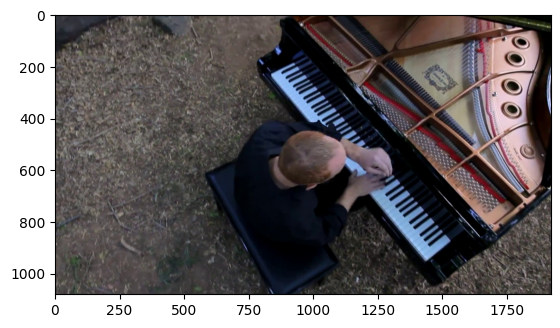

In [421]:
import cv2
import matplotlib.pyplot as plt

IMG_PATH = '/home/jakub/Datasets/mpii/'
testim = cv2.cvtColor(cv2.imread(IMG_PATH + dane[0], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.imshow(testim)

In [422]:
joint_dict = {
    joint_names[idx]: idx for idx in range(len(joint_names))
}
joint_dict

{'r ankle': 0,
 'r knee': 1,
 'r hip': 2,
 'l hip': 3,
 'l knee': 4,
 'l ankle': 5,
 'pelvis': 6,
 'thorax': 7,
 'upper neck': 8,
 'head top': 9,
 'r wrist': 10,
 'r elbow': 11,
 'r shoulder': 12,
 'l shoulder': 13,
 'l elbow': 14,
 'l wrist': 15}

In [423]:
from typing import List, Tuple
import numpy as np


def scale_points(size: Tuple, old_size: Tuple, points: List[Tuple]):
    old_y, old_x = old_size
    new_y, new_x = size

    ratio_x = new_x / old_x
    ratio_y = new_y / old_y

    output_list = []

    for point in points:
        p_y, p_x = point
        output_list.append((ratio_y * p_y, ratio_x * p_x))

    return output_list


def mark_points_on_image(image, points: List[Tuple], color: Tuple = (255, 255, 255), radius = 5, thickness = 5):
    copied_img = image.copy()

    for point in points:
        copied_img = cv2.circle(copied_img, (round(point[1]), round(point[0])), radius=radius, color=color, thickness=thickness)

    return copied_img

def draw_skeleton(image, points: List[Tuple], color: Tuple = (255, 255, 255), radius = 5, thickness = 5):
    """
    Need to provide list of points according to current approach
    (0 - r ankle, 1 - r knee, 2 - r hip, 3 - l hip, 4 - l knee, 5 - l ankle, 6 - pelvis, 7 - thorax, 8 - upper neck, 9 - head top, 10 - r wrist, 11 - r elbow, 12 - r shoulder, 13 - l shoulder, 14 - l elbow, 15 - l wrist)
    :param image:
    :param points:
    :param color:
    :param radius:
    :param thickness:
    :return:
    """
    copied_img = image.copy()

    points = [(np.round(point[0]).astype(int), np.round(point[1]).astype(int)) for point in points]

    #left lower side
    copied_img = cv2.line(copied_img, (points[0][1], points[0][0]), (points[1][1], points[1][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[1][1], points[1][0]), (points[2][1], points[2][0]), color=color, thickness=thickness)

    #right lower side
    copied_img = cv2.line(copied_img, (points[5][1], points[5][0]), (points[4][1], points[4][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[4][1], points[4][0]), (points[3][1], points[3][0]), color=color, thickness=thickness)

    #pelvis
    copied_img = cv2.line(copied_img, (points[2][1], points[2][0]), (points[6][1], points[6][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[3][1], points[3][0]), (points[6][1], points[6][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[6][1], points[6][0]), (points[7][1], points[7][0]), color=color, thickness=thickness)

    #thorax
    copied_img = cv2.line(copied_img, (points[7][1], points[7][0]), (points[8][1], points[8][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[7][1], points[7][0]), (points[12][1], points[12][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[7][1], points[7][0]), (points[13][1], points[13][0]), color=color, thickness=thickness)

    #head
    copied_img = cv2.line(copied_img, (points[8][1], points[8][0]), (points[9][1], points[9][0]), color=color, thickness=thickness)

    #left arm
    copied_img = cv2.line(copied_img, (points[13][1], points[13][0]), (points[14][1], points[14][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[14][1], points[14][0]), (points[15][1], points[15][0]), color=color, thickness=thickness)

    #right arm
    copied_img = cv2.line(copied_img, (points[12][1], points[12][0]), (points[11][1], points[11][0]), color=color, thickness=thickness)
    copied_img = cv2.line(copied_img, (points[11][1], points[11][0]), (points[10][1], points[10][0]), color=color, thickness=thickness)



    for point in points:
        copied_img = cv2.circle(copied_img, (round(point[1]), round(point[0])), radius=radius, color=color, thickness=thickness)

    return copied_img

In [424]:
# joints = {6: (474, 676), 7: (325, 675), 8: (287.67, 675.2378), 9: (205.33, 675.7622), 1: (604, 723), 2: (471, 715), 3: (476, 636), 4: (604, 628), 10: (488, 752), 11: (405, 743), 12: (325, 731), 13: (325, 618), 14: (412, 585), 15: (479, 538)}
joint_list = list(joints.values())
for j in joint_list:
    if type(j) != tuple:
        joint_list.remove(j)
joint_list

[(350, 362),
 (297, 347),
 (224, 350),
 (226, 317),
 (290, 297),
 (312, 336),
 (225, 334),
 (173, 312),
 (165.7604, 310.2242),
 (127.2396, 300.7758),
 (192, 310),
 (186, 326),
 (168, 335),
 (177, 288),
 (199, 279),
 (194, 268)]

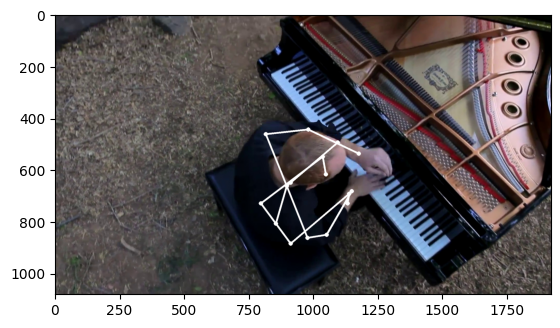

In [425]:
plt.imshow(draw_skeleton(testim, current_joints))

In [346]:
mat_file = scipy.io.loadmat("../../data/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat")
annotations = mat_file['RELEASE'][0]['annolist']
acts = mat_file['RELEASE'][0]['act']

image_file_names = [anno[0][0]['name'][0] for anno in annotations[0][0]['image']]

img_train = mat_file['RELEASE'][0]['img_train'][0].T

act_names = [act['act_name'][0][0] if act['act_name'][0].size > 0 else None for act in acts[0]]

cat_names = [act['cat_name'][0][0] if act['cat_name'][0].size > 0 else None for act in acts[0]]

person_count = [people[0].size for people in mat_file['RELEASE'][0]['single_person'][0]]

result = []
n = annotations[0].size

for i in range(n):
    result.append([image_file_names[i], act_names[i], cat_names[i], person_count[i], img_train[i][0]])